In [1]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/yogesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
movie_data = load_files("/home/yogesh/fall19/ml660/project/txt_sentoken")
X, y = movie_data.data, movie_data.target

In [16]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    print(document)
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents)

In [15]:
X.toarray().shape

(2000, 1500)

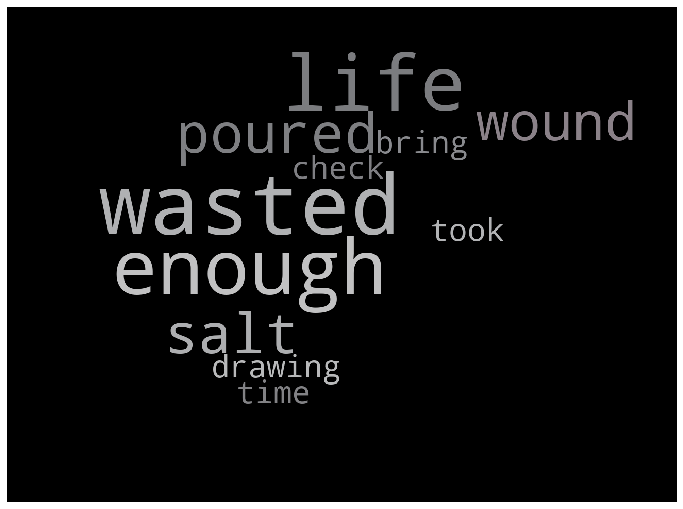

[[241  40]
 [ 68 201]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       281
           1       0.83      0.75      0.79       269

    accuracy                           0.80       550
   macro avg       0.81      0.80      0.80       550
weighted avg       0.81      0.80      0.80       550

0.8036363636363636


In [18]:
import numpy as np
import pandas as pd
import warnings 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps
from wordcloud import ImageColorGenerator
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')


def read_file(filelist):
    """
    Creates dataframe of the dataset by UCI - Sentiment Analysis 

    :param filelist: list of file directory.
    """
    
    df_uci = pd.concat([pd.read_csv(item, header=None, sep='\t') for item in filelist], axis=0)
    df_uci.columns = ['reviews', 'sentiment']
    df_array = df_uci['reviews'].to_numpy()
    y = df_uci['sentiment'].to_numpy()
    return df_uci, df_array, y

def preprocessing(df_uci, df_array):
    """
    Contains preprocessing methods such as Tokenization and Vectorization

    :param df_uci: Dataframe containing dataset 
    """
    # reviews = df_uci['reviews'].split()
    reviews = df_uci.reviews.str.cat(sep=' ')
    tokens = word_tokenize(reviews) 
    stop_words = set(stopwords.words('english'))
    tokens_stop_words = [token for token in tokens if not token in stop_words]
    words = [word for word in tokens_stop_words if word.isalpha()]

    # fdist = FreqDist()
    # for word in words:
    #     fdist[word.lower()] += 1

    # df_array = df_uci['reviews'].to_numpy()
    word_list = []
    for i in range(len(df_array)):
        tokens_new = word_tokenize(df_array[i])
        words = [word for word in tokens_new if word.isalpha()]
        doc = ' '.join(words)
        word_list.append(doc) 

    return words, word_list

def wordcloud(words):
    """


    """

    words_string = TreebankWordDetokenizer().detokenize(words)
    char_mask = np.array(Image.open("/home/yogesh/Git/sentiment_analysis/image.jpg"))    
    image_colors = ImageColorGenerator(char_mask)
    wordcloud = WordCloud(background_color="black", max_words=200, width=400, height=400, mask=char_mask, random_state=1).generate(words_string)

    fig = plt.figure(1, figsize=(12,12))
    plt.imshow(wordcloud.recolor(color_func=image_colors))
    plt.axis("off")
    plt.show()

    # frequency_dist = nltk.FreqDist(words)
    # wordcloud = WordCloud(background_color='black', max_words=200, width=400, height=400).generate_from_frequencies(frequency_dist)
    # plt.imshow(wordcloud)

    # plt.axis("off")
    # plt.show()
    
def tfidfvectorization(word_list):
    """

    """
    tfidfconv = TfidfVectorizer(stop_words=stopwords.words('english'))
    X = tfidfconv.fit_transform(word_list)
    return X

def test_train_split(X,y):
    """


    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    return X_train, X_test, y_train, y_test

def randomforest(X_train, X_test, y_train, y_test):
    """

    """
    classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
    classifier.fit(X_train, y_train) 
    y_pred = classifier.predict(X_test)

    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test, y_pred))


def main():
    filelist = ['/home/yogesh/fall19/ml660/project/sentiment_labelled_sentences/amazon_cells_labelled.txt', '/home/yogesh/fall19/ml660/project/sentiment_labelled_sentences/imdb_labelled.txt', '/home/yogesh/fall19/ml660/project/sentiment_labelled_sentences/yelp_labelled.txt']
    # print(read_file(filelist))
    df, df_array, labels = read_file(filelist)
    words, words_list = preprocessing(df, df_array)
    wordcloud(words)
    X = tfidfvectorization(words_list)
    X_train, X_test, y_train, y_test = test_train_split(X,labels)
    randomforest(X_train, X_test, y_train, y_test)

if __name__ == "__main__":
    main()

In [3]:
import numpy as np
import pandas as pd
import warnings 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps
from wordcloud import ImageColorGenerator
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [4]:
def read_file(filelist):
    """
    Creates dataframe of the dataset by UCI - Sentiment Analysis 

    :param filelist: list of file directory.
    """
    
    df_uci = pd.concat([pd.read_csv(item, header=None, sep='\t') for item in filelist], axis=0)
    df_uci.columns = ['reviews', 'sentiment']
    return df_uci

In [35]:
def preprocessing(df_uci):
    """
    Contains preprocessing methods such as Tokenization and Vectorization

    :param df_uci: Dataframe containing dataset 
    """
    # reviews = df_uci['reviews'].split()
    reviews = df_uci.reviews.str.cat(sep=' ')
    tokens = word_tokenize(reviews) 
    stop_words = set(stopwords.words('english'))
    tokens_stop_words = [token for token in tokens if not token in stop_words]
    words = [word for word in tokens_stop_words if word.isalpha()]

    words_string = TreebankWordDetokenizer().detokenize(words)
    char_mask = np.array(Image.open("/home/yogesh/Git/sentiment_analysis/image.jpg"))    
    image_colors = ImageColorGenerator(char_mask)
    wordcloud = WordCloud(background_color="black", max_words=200, width=400, height=400, mask=char_mask, random_state=1).generate(words_string)

    fig = plt.figure(1, figsize=(12,12))
    plt.imshow(wordcloud.recolor(color_func=image_colors))
    plt.axis("off")
    plt.show()
    return words

In [65]:
def tfidfvectorization(df_uci):
    """

    """
    df_array = df_uci['reviews'].to_numpy()
    word_list = []
    for i in range(len(df_array)):
        tokens_new = word_tokenize(df_array[i])
        words = [word for word in tokens_new if word.isalpha()]
        doc = ' '.join(words)
        word_list.append(doc) 
    
    tfidfconv = TfidfVectorizer(max_features=2000, min_df=2, max_df=0.7, stop_words=stopwords.words('english'))
#     tfidfconv = TfidfVectorizer(stop_words=stopwords.words('english'))
    X = tfidfconv.fit_transform(word_list)
#     print(X.toarray().shape) 
    return X

In [61]:
def test_train_split(X, df_uci):
    """


    """
    y = df_uci['sentiment'].to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    print(X_train.shape)
    print(type(X_test))
    print(y_train.shape)
    print(y_test.shape) 
    return X_train, X_test, y_train, y_test

In [10]:
def randomforest(X_train, X_test, y_train, y_test):
    """

    """
    classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
    classifier.fit(X_train, y_train) 
    y_pred = classifier.predict(X_test)
    
#     print(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test, y_pred))

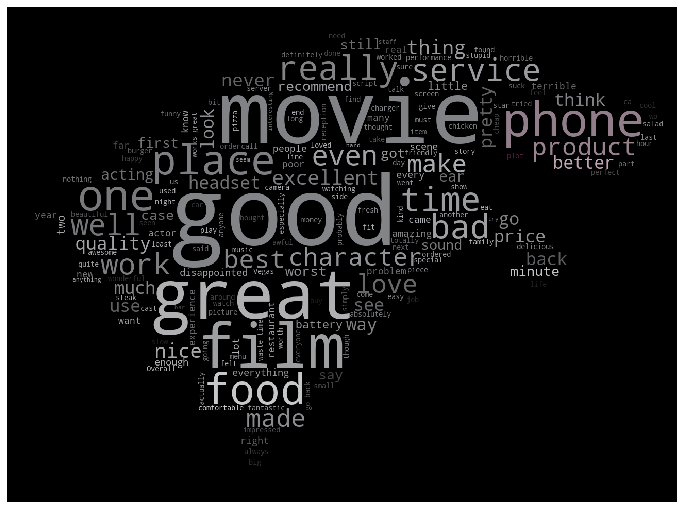

(2748, 2000)
[[243  38]
 [ 65 204]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       281
           1       0.84      0.76      0.80       269

    accuracy                           0.81       550
   macro avg       0.82      0.81      0.81       550
weighted avg       0.82      0.81      0.81       550

0.8127272727272727


In [11]:
filelist = ['/home/yogesh/fall19/ml660/project/sentiment_labelled_sentences/amazon_cells_labelled.txt', '/home/yogesh/fall19/ml660/project/sentiment_labelled_sentences/imdb_labelled.txt', '/home/yogesh/fall19/ml660/project/sentiment_labelled_sentences/yelp_labelled.txt']

df = read_file(filelist)
preprocessing(df)
X = tfidfvectorization(df)
X_train, X_test, y_train, y_test = test_train_split(X, df)
randomforest(X_train, X_test, y_train, y_test)  

## For IMDB DATASET

In [12]:
import glob

read_files = glob.glob("*.txt")

with open("result.txt", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

<_io.BufferedWriter name='result.txt'>

In [19]:
import os
 
file_names = os.listdir('/home/yogesh/fall19/ml660/project/aclImdb/train/pos/')
output = ''
for file in file_names:
    with open(file) as f:
        content = f.read().strip()
    output += content + '\t0\n' #  This will use a placeholder of 0 for all labels.
with open('OutputFileName', 'wb') as f:
    f.write(output)

FileNotFoundError: [Errno 2] No such file or directory: '8414_7.txt'

In [15]:
Imdb_train_data = []
Imdb_train_labels = []
Imdb_test_data = []
Imdb_test_labels = []
UCI_train_data = []
UCI_train_labels = []

dirname = "/home/yogesh/fall19/ml660/project/aclImdb/train/pos/"
for fname in os.listdir(dirname):
    with open(os.path.join(dirname, fname), 'r') as f:
        content = f.read()
        Imdb_train_data.append(content)
        Imdb_train_labels.append("pos")

dirname = "/home/yogesh/fall19/ml660/project/aclImdb/train/neg/"
for fname in os.listdir(dirname):
    with open(os.path.join(dirname, fname), 'r') as f:
        content = f.read()
        Imdb_train_data.append(content)
        Imdb_train_labels.append("neg")

In [75]:
reviews_train = []
for line in open('/home/yogesh/fall19/ml660/project/movie_data/full_train.txt', 'r'):
    reviews_train.append(line.strip())
    
reviews_test = []
for line in open('/home/yogesh/fall19/ml660/project/movie_data/full_test.txt', 'r'):
    reviews_test.append(line.strip())
    
df_train = pd.DataFrame(reviews_train, columns=['reviews'])

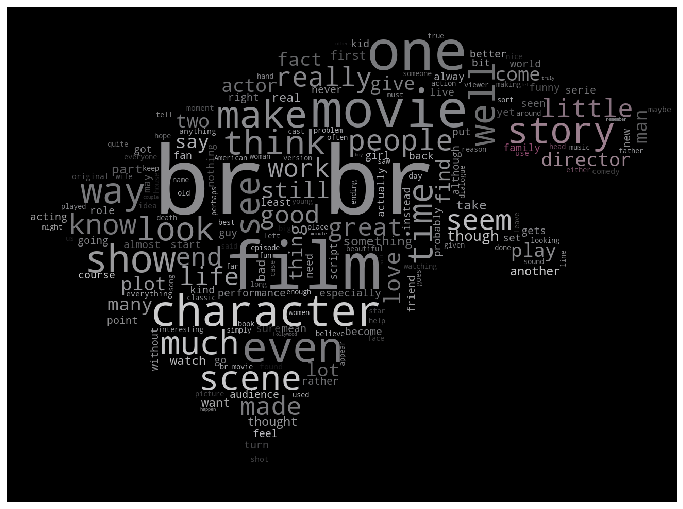

In [36]:
temp = preprocessing(df_train) 

In [41]:
import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(reviews_train)
reviews_test_clean = preprocess_reviews(reviews_test)

In [55]:
df_train = pd.DataFrame(reviews_train_clean, columns=['reviews'])

In [76]:
X = tfidfvectorization(df_train)

In [67]:
target = pd.DataFrame([1 if i < 12500 else 0 for i in range(25000)], columns=['sentiment'])

In [79]:
X_train, X_val, y_train, y_val = test_train_split(X, target)
# randomforest(X_train, X_test, y_train, y_test) 

(20000, 2000)
<class 'scipy.sparse.csr.csr_matrix'>
(20000,)
(5000,)


In [80]:
from sklearn.linear_model import LogisticRegression
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

Accuracy for C=0.01: 0.8202
Accuracy for C=0.05: 0.8442
Accuracy for C=0.25: 0.8584
Accuracy for C=0.5: 0.861
Accuracy for C=1: 0.8636
